# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

In [113]:
# stundent details example: John S. 9812
#                       student details 1: Daniel Z. 8060
#                       student details 2: Adi C. 4050


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT 5 Auto  
Goal: To make sure the dataset is clean and ready for analysis, without duplicates or missing values breaking the pipeline.

Propmpt1: I have the Titanic CSV dataset. How do I check for missing values and duplicates?

Propmpt2: What’s the best way to split the dataset into features (X) and target (y) before modeling?

Goal: To standardize the preprocessing workflow for both numeric and categorical features, ensuring consistency across train/test splits.

Propmpt1: How do I build a preprocessing pipeline for numerical features that imputes missing values and scales them with StandardScaler or MinMaxScaler?
    
Propmpt2: How do I preprocess categorical features by imputing missing values with the most frequent category and applying one-hot encoding?

Propmpt3: How do I combine numerical and categorical pipelines with a ColumnTransformer?

Goal: To train multiple models with hyperparameter tuning, ensuring fair comparison using cross-validation.

Propmpt1: How can I build a full pipeline that includes preprocessing and a KNN classifier?
    
Propmpt2: What hyperparameters should I try for KNN (like n_neighbors and distance metric)
    
Propmpt3: How do I build a pipeline for Naive Bayes and tune parameters like var_smoothing and priors?
    
Propmpt4: How do I run GridSearchCV with cross-validation on these pipelines to compare models?

Goal: To organize and compare model performance in a clear way, focusing on F1 score as the main metric.
    
Propmpt1: How can I sort the results by F1 score and see the best-performing setup for each model?
    
</pre>


## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this assignment we work with the Titanic dataset, which contains information about the passengers such as age, gender, ticket class, family members onboard, fare price, and embarkation port. The learning problem is a supervised binary classification task, where the goal is to predict whether a passenger survived (1) or not (0) based on these features.




    
</pre>

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [93]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

loading the CSV and showing 5 first rows of each data frame.

loading the CSV and showing 5 first rows of each data frame.

In [95]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


# Preprocessing

## Data Cleansing

Handle duplicated rows


In [29]:
train_num_rows = train_df.shape[0]
print(f"Number of rows in train data frame: {train_num_rows}")

train_df.drop_duplicates(keep='first',inplace=True)
train_df = train_df.reset_index(drop=True)
train_num_rows = train_df.shape[0]

print(f"Number of rows in train data frame after removing duplicated rows is: {train_num_rows}\n")

Number of rows in train data frame: 712
Number of rows in train data frame after removing duplicated rows is: 632



Handle none/null values

In [30]:
train_columns_with_none = train_df.columns[train_df.isnull().any()]
for column in train_columns_with_none:
    print(column)
test_columns_with_none = test_df.columns[test_df.isnull().any()]
for column in test_columns_with_none:
    print(column)

As we see, There are not none values in our data frames.

# EDA and Feature Engineering


Train Data Summary Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000

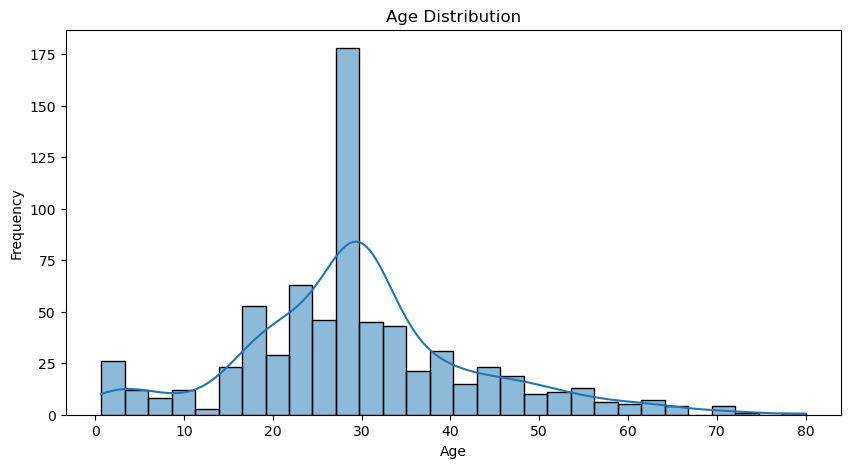

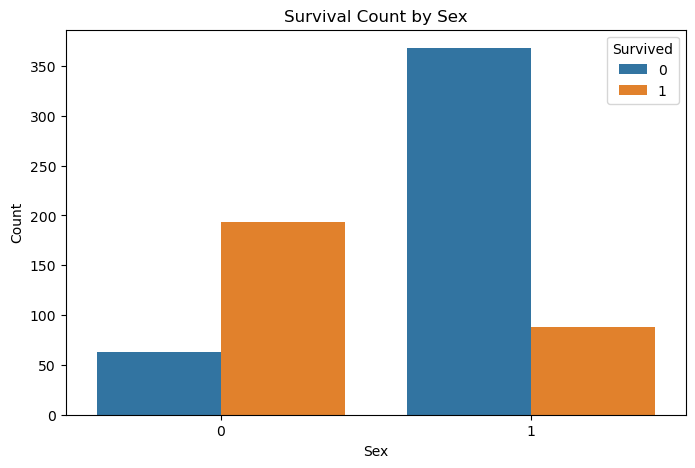

In [111]:
print("\nTrain Data Summary Statistics:")
print(train_data.describe(include='all'))

# Visualization 1: Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Survival by Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



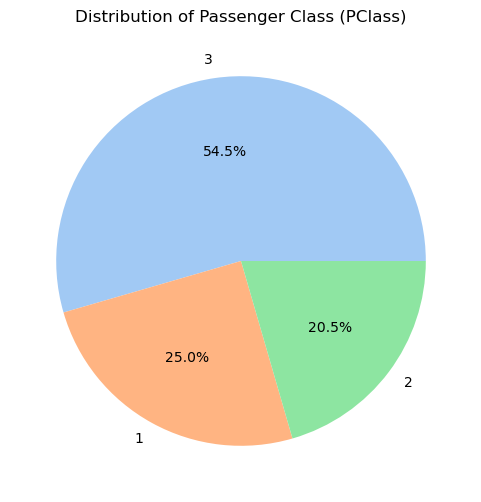

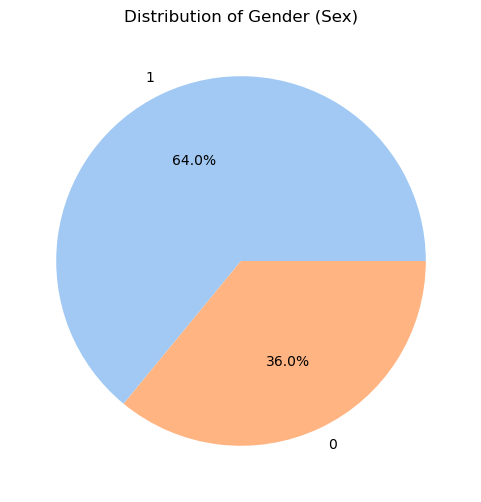

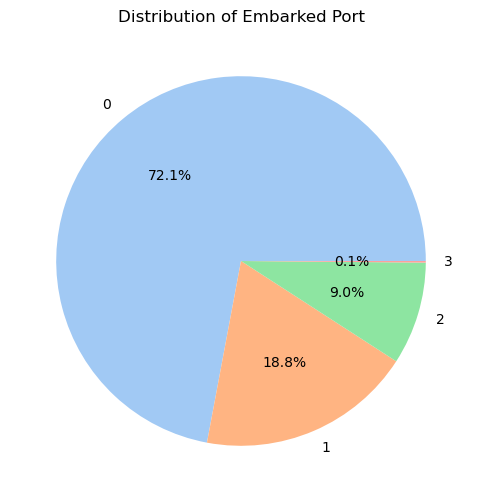

In [107]:
# Distribution of 'PClass'
plt.figure(figsize=(6, 6))
pclass_distribution = train_data['Pclass'].value_counts()
plt.pie(pclass_distribution, labels=pclass_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Passenger Class (PClass)')
plt.show()

# Distribution of 'Sex'
plt.figure(figsize=(6, 6))
sex_distribution = train_data['Sex'].value_counts()
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Gender (Sex)')
plt.show()

# Distribution of 'Embarked'
plt.figure(figsize=(6, 6))
embarked_distribution = train_data['Embarked'].value_counts()
plt.pie(embarked_distribution, labels=embarked_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Embarked Port')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [98]:
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch'] 
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())]) 

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [114]:

models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

param_grids = {
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9],  
        'classifier__p': [1, 2]  
    },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7],  
        'classifier__priors': [None, [0.4, 0.6]] 
    }
}

scalers = {
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler()
}

scorers = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

results = []
for scaler_name, scaler in scalers.items():
    for name, model in models.items():
        pipeline = Pipeline(steps=[('scaler', scaler), ('classifier', model)])
        grid_search = GridSearchCV(pipeline, param_grids.get(name, {}), cv=5, scoring=scorers, refit='f1', n_jobs=-1)
        grid_search.fit(X, y)

        cv_results = cross_validate(grid_search.best_estimator_, X, y, cv=5, scoring=scorers)
        for i in range(len(grid_search.cv_results_['params'])):
            results.append({
                'Method': name,
                'Hyper Parameter': grid_search.cv_results_['params'][i],
                'Scaling Method': scaler_name,
                'Precision': grid_search.cv_results_['mean_test_precision'][i],
                'Recall': grid_search.cv_results_['mean_test_recall'][i],
                'F1': grid_search.cv_results_['mean_test_f1'][i]
            })



In [100]:
results_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
sorted_results_df = results_df.sort_values(by='F1', ascending=False)
print("\nSorted Model Comparison (by F1 Score):")
display(sorted_results_df)


Sorted Model Comparison (by F1 Score):


,Method,Hyper Parameter,Scaling Method,Precision,Recall,F1
1,K-Nearest Neighbors,"{'classifier__n_neighbors': 3, 'classifier__p': 2}",Standard Scaler,0.791639,0.787811,0.789033
15,K-Nearest Neighbors,"{'classifier__n_neighbors': 3, 'classifier__p': 2}",MinMax Scaler,0.790788,0.783538,0.786155
14,K-Nearest Neighbors,"{'classifier__n_neighbors': 3, 'classifier__p': 1}",MinMax Scaler,0.791071,0.783543,0.786029
4,K-Nearest Neighbors,"{'classifier__n_neighbors': 7, 'classifier__p': 1}",Standard Scaler,0.794857,0.779285,0.783737
6,K-Nearest Neighbors,"{'classifier__n_neighbors': 9, 'classifier__p': 1}",Standard Scaler,0.791462,0.780020,0.782787
5,K-Nearest Neighbors,"{'classifier__n_neighbors': 7, 'classifier__p': 2}",Standard Scaler,0.787490,0.778225,0.781115
16,K-Nearest Neighbors,"{'classifier__n_neighbors': 5, 'classifier__p': 1}",MinMax Scaler,0.786588,0.772861,0.776698
7,K-Nearest Neighbors,"{'classifier__n_neighbors': 9, 'classifier__p': 2}",Standard Scaler,0.782950,0.771109,0.774381
2,K-Nearest Neighbors,"{'classifier__n_neighbors': 5, 'classifier__p': 1}",Standard Scaler,0.780381,0.771833,0.774256
0,K-Nearest Neighbors,"{'classifier__n_neighbors': 3, 'classifier__p': 1}",Standard Scaler,0.777035,0.773754,0.774239


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [101]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [112]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=3, p=2))])
pipeline.fit(X, y)
print("Model training completed with the best combination!")


Model training completed with the best combination!


## Part 5 - Apply on test and show model performance estimation

In [103]:
y_pred = pipeline.predict(X)
print(y_pred[:5])
print(y[:5].values)


[1 1 0 0 0]
[1 1 0 0 0]


#### Printing the first 5 predicted classifications VS the real classifications


In [104]:
precision = precision_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8617
Recall: 0.8509
F1 Score: 0.8554


Showing the model's performance report